In [296]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

class DiscountedCashFlow:
    """
    initial FCF value & discount rate are must-have arguments for any DCF
    growth could be 0% so I'll keep that as a  positional argument that the user explicitly writes 
    """
    def __init__(self, FCF_t0,r,g = None):
        self.FCF_t0=FCF_t0
        self.r = r/100
        self.g = g/100
    def dcf_old(self,n):
        t=0
        
        for i in range(n):
            k=i+1
            t+=((self.FCF_t0*((1+self.g)**(k))))/((1+self.r)**(k))
        self.dcf_val=t
        return t   
    
    def dcf(self,n):
        initial_fcf=self.FCF_t0
        value=0
        for i in range(n):
            if(i==0):
                fcf_t=initial_fcf*(1+self.g)/(1+self.r)
            else:
                fcf_t*=(1+self.g)/(1+self.r)
            
            value+=fcf_t       # we are summing tnext each time its iterated over in the loop. 
        return value
        
        self.dcf_val=value
        self.fcf_tn = fcf_t # This is wrong. I need to fix this so it takes the last fcf_t that has been iterated
        self.terminal_year = len(range(0,n))
        
     
    def TV(self):
        terminal_value = self.fcf_tn
        t = self.terminal_year
        perpetual_gr = ((1+self.r)-(1+self.g))
        return((terminal_value)/((perpetual_gr)**t))+(self.dcf_val)
        
    def MC(self,std_dev):
        average = self.FCF_t0
        self.std_dev = std_dev
        num_reps = 500
        num_simulations = 1000
        fcf_mc = np.random.normal(average, std_dev, num_reps).round(2)
        self.fcf_mc = fcf_mc
        df = pd.DataFrame(index=range(num_reps),data={'fcf':fcf_mc})
        self.df = df 
        return df['fcf'].plot(kind='hist', title='Initial FCF Monte Carlo')

    def desc_stats(self):
        data = self.df
        desc_MC = data.describe().round(0).style.format('{:,}')
        return desc_MC
        
        
    # Create a method that runs 
        #for i in range(self.n):
            #k=i+1
            #t+= ((self.FCF_t0*((1+self.g)*(k))))/((1+self.r)*(k))
        #self.dcf_val=t

In [297]:
cash_flow=DiscountedCashFlow(10,3, 2)
cash_flow.dcf(5)


48.56240449955173

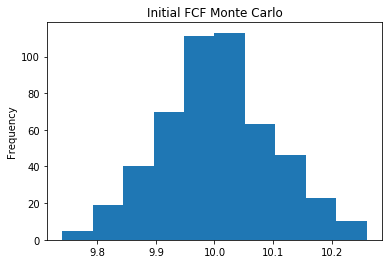

In [298]:
cash_flow.MC(0.1)

In [300]:
cash_flow.desc_stats()

,fcf
count,500.0
mean,10.0
std,0.0
min,10.0
25%,10.0
50%,10.0
75%,10.0
max,10.0


In [193]:
cash_flow.TV()

AttributeError: 'DiscountedCashFlow' object has no attribute 'fcf_tn'

In [51]:
cash_flow=DiscountedCashFlow(10,3, 2)
cash_flow.dcf(5)
print(cash_flow.dcf_val)

48.56240449955173


In [49]:
cash_flow.dcf_old(5)
print(cash_flow.dcf_val)

48.56240449955175


In [4]:
for i in range(5):
      print("i currently equals: ", i)


i currently equals:  0
i currently equals:  1
i currently equals:  2
i currently equals:  3
i currently equals:  4


In [24]:
def ns(n):
    t = 0
    if n == 0:
        return 1
    else: 
        for i in range(n):
            tnext= 100
            t+=tnext 
        return t

In [25]:
ns(5)

500